Please go through the "building_strategies" notebook first before you go through this notebook


## Some Prebuilt Reporting ##

Lets first build the strategy described in that notebook, add it to a portfolio and run the portfolio

In [1]:
import warnings

import pandas as pd
import numpy as np
import pyqstrat as pq
from pyqstrat.notebooks.support.build_example_strategy import build_example_strategy

strategy = build_example_strategy(lookback_period = 10, num_std = 2)

In [2]:
portfolio = pq.Portfolio()
portfolio.add_strategy('bb_strategy', strategy)
portfolio.run()

Many objects have functions that return pandas dataframes for ease of use.  Any function that returns a dataframe starts with df_ so its easy to tell which dataframes an object returns.

Probably the most common function you will use is df_data on the strategy object.  This returns the market data, indicators, signal values and P&L at each market data bar.  The last column, i is the integer index of that bar, and can be used to query data in other dataframes or objects for that strategy.

In [3]:
strategy.df_data().head()

,timestamp,c,h,l,lower_band,o,sma,upper_band,bb_signal,unrealized,realized,fee,net_pnl,position,price,equity,i
0,2018-03-23 12:40:00,8403,8450,8371,nan,8450,nan,nan,2,nan,nan,nan,nan,nan,nan,nan,0
1,2018-03-23 12:45:00,8395,8412,8369,nan,8403,nan,nan,2,nan,nan,nan,nan,nan,nan,nan,1
2,2018-03-23 12:50:00,8356,8397,8350,nan,8397,nan,nan,2,nan,nan,nan,nan,nan,nan,nan,2
3,2018-03-23 12:55:00,8311,8357,8265,nan,8356,nan,nan,2,nan,nan,nan,nan,nan,nan,nan,3
4,2018-03-23 13:00:00,8331,8349,8311,nan,8311,nan,nan,2,nan,nan,nan,nan,nan,nan,nan,4


You can also look at just the PNL or just the marketdata by themselves.

In [4]:
strategy.df_pnl().head()

,unrealized,realized,fee,net_pnl,position,price,equity
date,,,,,,,
2018-03-23 12:40:00,0,0,0,0,0,0,1e+06
2018-03-23 12:45:00,-145.9,0,0,-205.9,12,8395,9.998e+05
2018-03-23 12:50:00,-616.5,0,0,-676.5,12,8356,9.993e+05
2018-03-23 12:55:00,-1158,0,0,-1218,12,8311,9.988e+05
2018-03-23 13:00:00,-920.1,0,0,-980.1,12,8331,9.99e+05


We can look at orders and trades that were created during this run

In [5]:
strategy.df_orders().head()

,symbol,type,date,qty,params
0,BTC,StopLimitOrder,2018-03-23 12:40:00,12,"{'trigger_price': 8403.4, 'limit_price': nan}"
1,BTC,MarketOrder,2018-03-23 13:25:00,-12,{}
2,BTC,StopLimitOrder,2018-03-23 13:40:00,-12,"{'trigger_price': 8323.37, 'limit_price': nan}"
3,BTC,MarketOrder,2018-03-23 14:00:00,12,{}
4,BTC,StopLimitOrder,2018-03-23 14:05:00,12,"{'trigger_price': 8419.75, 'limit_price': nan}"


In [6]:
strategy.df_trades().head()

,symbol,date,qty,price,fee,commission,order_date,order_qty,order_params
0,BTC,2018-03-23 12:45:00,12,8408,0,60,2018-03-23 12:40:00,12,"{'trigger_price': 8403.4, 'limit_price': nan}"
1,BTC,2018-03-23 13:30:00,-12,8325,0,-60,2018-03-23 13:25:00,-12,{}
2,BTC,2018-03-23 13:45:00,-12,8315,0,-60,2018-03-23 13:40:00,-12,"{'trigger_price': 8323.37, 'limit_price': nan}"
3,BTC,2018-03-23 14:05:00,12,8411,0,60,2018-03-23 14:00:00,12,{}
4,BTC,2018-03-23 14:10:00,12,8430,0,60,2018-03-23 14:05:00,12,"{'trigger_price': 8419.75, 'limit_price': nan}"


You can also look at the returns at the portfolio level (i.e. summing up several strategies)

In [7]:
portfolio.df_returns()

,bb_strategy,equity,ret
date,,,
2018-03-23,9.992e+05,9.992e+05,nan
2018-03-24,9.961e+05,9.961e+05,-0.003153
2018-03-25,9.875e+05,9.875e+05,-0.008573
2018-03-26,9.755e+05,9.755e+05,-0.01219


We can also get data as native Python objects as opposed to pandas dataframes.

In [8]:
strategy.trades(start_date = '2018-03-23', end_date = '2018-03-24')

[BTC 2018-03-23 12:45 qty: 12.0 prc: 8407.545 60.0 order: BTC 2018-03-23 12:40 qty: 12.0 trigger_prc: 8403.4 limit_prc: nan enter long filled,
 BTC 2018-03-23 13:30 qty: -12.0 prc: 8324.77 -60.0 order: BTC 2018-03-23 13:25 qty: -12.0 exit long filled,
 BTC 2018-03-23 13:45 qty: -12.0 prc: 8315.095000000001 -60.0 order: BTC 2018-03-23 13:40 qty: -12.0 trigger_prc: 8323.37 limit_prc: nan enter short filled,
 BTC 2018-03-23 14:05 qty: 12.0 prc: 8410.599999999999 60.0 order: BTC 2018-03-23 14:00 qty: 12.0 exit short filled,
 BTC 2018-03-23 14:10 qty: 12.0 prc: 8430.015 60.0 order: BTC 2018-03-23 14:05 qty: 12.0 trigger_prc: 8419.75 limit_prc: nan enter long filled,
 BTC 2018-03-23 16:25 qty: -12.0 prc: 8592.49 -60.0 order: BTC 2018-03-23 16:20 qty: -12.0 exit long filled,
 BTC 2018-03-23 16:55 qty: 12.0 prc: 8663.805 60.0 order: BTC 2018-03-23 16:50 qty: 12.0 trigger_prc: 8655.58 limit_prc: nan enter long filled,
 BTC 2018-03-23 18:05 qty: -12.0 prc: 8608.575 -60.0 order: BTC 2018-03-23 18

## Adding your Own Metrics ##

Each strategy may have metrics that you want to measure that are specific to that strategy.  To add these, you can use the Evaluator object which can make things easier.

To evaluate a strategy we use the evaluate returns function.

In [9]:
strategy.evaluate_returns(plot = False);

,gmean,amean,std,shrp,srt,calmar,mar,mdd_pct,mdd_dates,dd_3y_pct,dd_3y_timestamps,up_dwn,2018
,-0.78,-0.00598,0.004719,-20.12,-20.12,63.45,63.45,-0.02375,2018-03-23/2018-03-26,-0.02375,2018-03-23/2018-03-26,0/3/0,-0.78


What if we want to add some more metrics to this.  For example, lets say we want to add a metric that looks at how many long trades we had versus short trades.  We can do this using an Evaluator object.

In [10]:
def compute_num_long_trades(trades):
    return len([trade for trade in trades if trade.order.reason_code == pq.ReasonCode.ENTER_LONG])

def compute_num_short_trades(trades):
    return len([trade for trade in trades if trade.order.reason_code == pq.ReasonCode.ENTER_SHORT])

evaluator = pq.Evaluator(initial_metrics = {'trades' : strategy.trades()})

evaluator.add_metric('num_long_trades', compute_num_long_trades, dependencies = ['trades'])
evaluator.add_metric('num_short_trades', compute_num_short_trades, dependencies = ['trades'])

evaluator.compute()

print('Long Trades: {} Short Trades: {}'.format(evaluator.metric('num_long_trades'), evaluator.metric('num_short_trades')))

Long Trades: 32 Short Trades: 47


The Evaluator takes care of dependency management so that if you want to compute a metric that relies on other metrics, it will compute the metrics in the right order.

Lets compute Maximum Adverse Execution for each trade.  MAE tells you the maximum loss each trade in its lifetime.  It's useful for figuring out where to put trailing stops. For example, if most of your profitable trades had a maximum loss during their life up to 5% but many losing trades had losses of 50% and 60%, it might make sense to place a trailing stop around 6% or 7% so you don't get stopped out of your profitable trades but get out of the losing ones quickly.  See Jaekle and Tomasini, page 66 for details

To do this we first have to first pair up entry and exit trades into a single "round-trip" trade.

In [23]:
import collections

trades = strategy.trades()

entry_trades = [trade for trade in trades if trade.order.reason_code == pq.ReasonCode.ENTER_LONG]
exit_trades = [trade for trade in trades if trade.order.reason_code == pq.ReasonCode.EXIT_LONG]

def compute_mae(entry_trades, exit_trades, c, timestamps):
    mae = np.empty(len(entry_trades)) * np.nan
    
    round_trip_pnl = np.empty(len(entry_trades)) * np.nan

    for i, entry in enumerate(entry_trades):
        if i == len(exit_trades): break
        exit = exit_trades[i]
        _round_trip_pnl = entry.qty * (exit.price - entry.price)
        running_price = c[(timestamps >= entry.timestamp) & (timestamps <= exit.timestamp)]
        running_pnl = entry.qty * (running_price - entry.price)
        _mae = -1 * min(_round_trip_pnl, np.min(running_pnl))
        _mae = _mae / entry.price # Get mae in % terms
        _mae = max(0, _mae) # If we have no drawdown for this trade, set it to 0
        mae[i] = _mae
        round_trip_pnl[i] = _round_trip_pnl / entry.price # Also store round trip pnl for this trade since we will have to plot it
    return mae, round_trip_pnl
        
def get_trades(trades, entry):
    rc = [pq.ReasonCode.ENTER_LONG, pq.ReasonCode.ENTER_SHORT] if entry else [pq.ReasonCode.EXIT_LONG, pq.ReasonCode.EXIT_SHORT]
    return [trade for trade in trades if trade.order.reason_code in rc]

evaluator = pq.Evaluator(initial_metrics = {'trades' : strategy.trades(), 
                                            'c' : strategy.indicator_values['BTC'].c,
                                           'timestamps' : strategy.timestamps})
evaluator.add_metric('entry_trades', lambda trades : get_trades(trades, True), dependencies=['trades'])
evaluator.add_metric('exit_trades', lambda trades : get_trades(trades, False), dependencies=['trades'])
evaluator.add_metric('mae', compute_mae, dependencies=['entry_trades', 'exit_trades', 'c', 'timestamps'])

evaluator.compute()



We could have easily done the same computation without using the Evaluator.  The main advantage of using the Evaluator is that you can reuse other metrics you are dependent on without having to recompute them each time, i.e it provides a local cache of metrics.

## Plotting ##

Now that we have maximum adverse execution, lets plot it.

pyqstrat plots are built on top of matplotlib.  Each pyqstrat Plot object contains a list of Subplot objects which in turn each contain a list of the data you want to plot in that subplot.

In this case, we want to plot round trip PNL for each trade versus its max drawdown (MAE).  The goal is to find out where to set a stop loss so we keep most of the winning trades while limiting our losses from the biggest losing trades.  Since we want to look at the effect of setting a stop loss on both winning and losing trades, we flip the sign of the round trip pnl on the losing trades and mark them in a different color to show the negative P&L.

<Figure size 432x288 with 0 Axes>

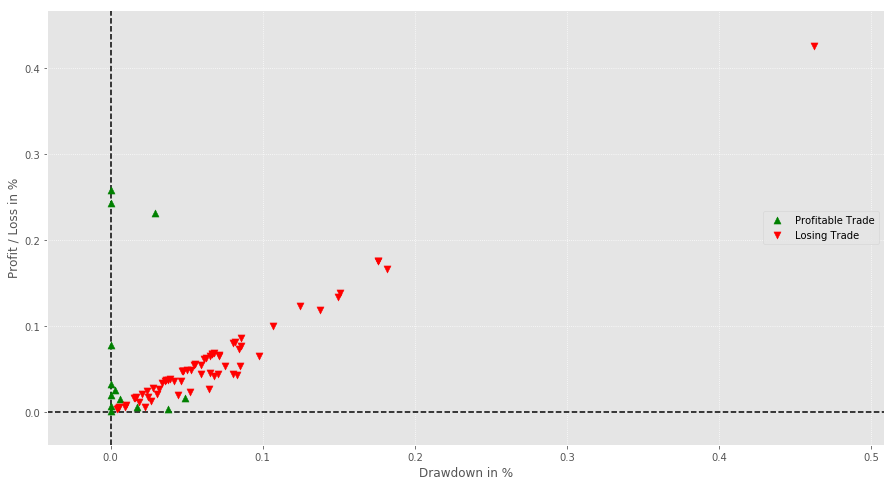

In [24]:
mae = evaluator.metric('mae')[0]
round_trip_pnl = evaluator.metric('mae')[1]

# Separate out positive trades from negative trades
round_trip_profit = round_trip_pnl[round_trip_pnl >= 0]
mae_profit = mae[round_trip_pnl >= 0]

round_trip_loss = round_trip_pnl[round_trip_pnl <= 0]
mae_loss = mae[round_trip_pnl <= 0]


subplot = pq.Subplot([
    pq.XYData('Profitable Trade', mae_profit, round_trip_profit, plot_type = 'scatter', marker = '^', marker_color = 'green'),
    pq.XYData('Losing Trade', mae_loss, -1 * round_trip_loss, plot_type = 'scatter', marker = 'v', marker_color = 'red')],
    horizontal_lines = [pq.HorizontalLine(y = 0, color = 'black')],
    vertical_lines = [pq.VerticalLine(x = 0, color = 'black')],
    xlabel = 'Drawdown in %', ylabel = 'Profit / Loss in %')

plot = pq.Plot([subplot])
plot.draw()

It looks like a good place to put a stop loss so we keep most of the winning trades but don't take big losses might be around 3%.  The next step would be to re-test the system with this stop loss inserted.  Lets plot the same data with a line showing the stop loss.

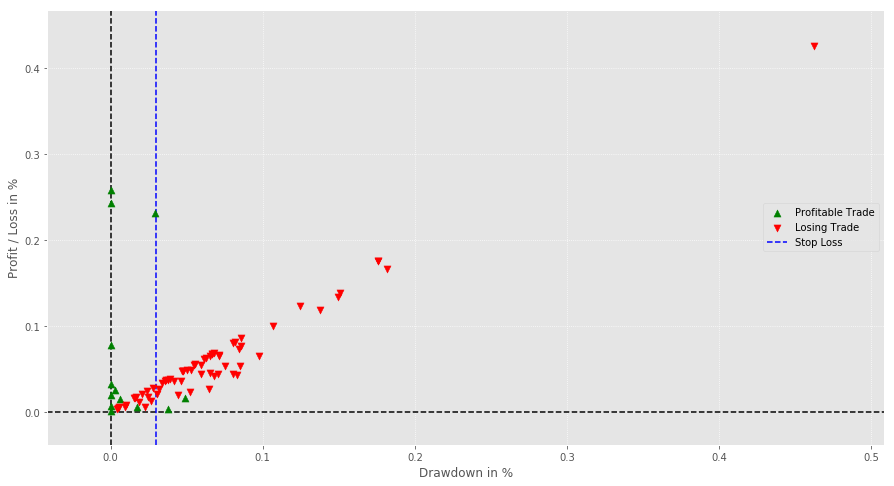

In [25]:
subplot = pq.Subplot([
    pq.XYData('Profitable Trade', mae_profit, round_trip_profit, plot_type = 'scatter', marker = '^', marker_color = 'green'),
    pq.XYData('Losing Trade', mae_loss, -1 * round_trip_loss, plot_type = 'scatter', marker = 'v', marker_color = 'red')],
    horizontal_lines = [pq.HorizontalLine(y = 0, color = 'black')],
    vertical_lines = [pq.VerticalLine(x = 0, color = 'black'), pq.VerticalLine(name = 'Stop Loss', x = 0.03, color = 'blue')],
    xlabel = 'Drawdown in %', ylabel = 'Profit / Loss in %')

plot = pq.Plot([subplot])
plot.draw()

There are several different kinds of subplots, including 3d subplots that you can include in the same plot.  See the code of the plot function in the Strategy class or the Evaluator class for eamples.